In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from scipy.stats import pearsonr

In [2]:
# Import data
data = pd.read_csv("./DataEncoding.csv")
data.head()

,Unnamed: 0,Name,Age,TEA_consumption,Coffee_consumption,EnergyDrinks_consumption,SoftDrinks_consumption,Milk_consumption,Juices_consumption,TEA_sleepingPattern,Coffee_sleepingPattern,EnergyDrinks_sleepingPattern,SoftDrinks_sleepingPattern,Milk_sleepingPattern,Juices_sleepingPattern,SleepingSchedule,BeveragesAfftectingSleep
0,0,Yagnesh,2,1,0,0,0,1,0,3,3,2,2,2,2,2,1
1,1,Omikumar Makadia,0,2,3,0,1,1,0,2,3,3,2,2,2,2,1
2,2,Devyash Shah,0,0,2,0,1,0,1,0,2,2,2,2,2,1,0
3,3,Om Shah,2,2,2,0,0,1,1,3,3,0,0,2,2,4,0
4,4,Sarthak dave,0,3,3,1,1,1,0,2,2,2,2,1,2,2,0


In [3]:
data.head()

,Unnamed: 0,Name,Age,TEA_consumption,Coffee_consumption,EnergyDrinks_consumption,SoftDrinks_consumption,Milk_consumption,Juices_consumption,TEA_sleepingPattern,Coffee_sleepingPattern,EnergyDrinks_sleepingPattern,SoftDrinks_sleepingPattern,Milk_sleepingPattern,Juices_sleepingPattern,SleepingSchedule,BeveragesAfftectingSleep
0,0,Yagnesh,2,1,0,0,0,1,0,3,3,2,2,2,2,2,1
1,1,Omikumar Makadia,0,2,3,0,1,1,0,2,3,3,2,2,2,2,1
2,2,Devyash Shah,0,0,2,0,1,0,1,0,2,2,2,2,2,1,0
3,3,Om Shah,2,2,2,0,0,1,1,3,3,0,0,2,2,4,0
4,4,Sarthak dave,0,3,3,1,1,1,0,2,2,2,2,1,2,2,0


# Correlation

In [4]:
data = data.iloc[:,1:]

In [5]:
corr_matrix = data.corr()
print(corr_matrix)

                                   Age  TEA_consumption  Coffee_consumption  \
Age                           1.000000         0.209984           -0.084707   
TEA_consumption               0.209984         1.000000            0.091706   
Coffee_consumption           -0.084707         0.091706            1.000000   
EnergyDrinks_consumption      0.144648         0.219100            0.182431   
SoftDrinks_consumption        0.052524         0.165072            0.189876   
Milk_consumption             -0.294904         0.076477            0.320673   
Juices_consumption           -0.138319        -0.119597            0.067954   
TEA_sleepingPattern           0.215516         0.741805           -0.053426   
Coffee_sleepingPattern        0.013524        -0.052482            0.645728   
EnergyDrinks_sleepingPattern  0.127695         0.051496            0.157804   
SoftDrinks_sleepingPattern   -0.015811         0.117686           -0.031355   
Milk_sleepingPattern         -0.178668         0.058

<ipython-input-5-f50fb7f1b89e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


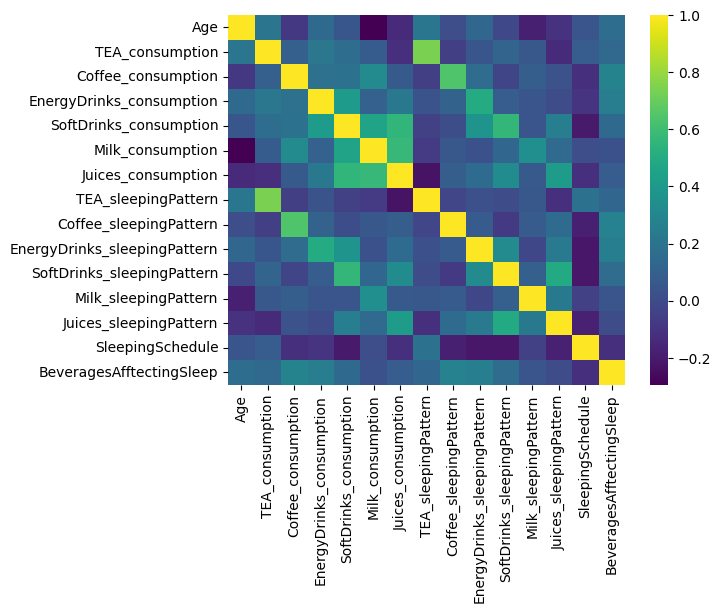

In [6]:
sns.heatmap(corr_matrix, cmap='viridis')

# show the plot
plt.show()

In [7]:
from scipy.stats import chi2_contingency

# load data
# data = pd.read_csv('data.csv')

# create contingency table
cont_table = pd.crosstab(data['BeveragesAfftectingSleep'], data['SleepingSchedule'])
print(cont_table)

# perform chi-squared test
chi2_stat, p_val, dof, exp_freq = chi2_contingency(cont_table)
print('Chi-Squared Statistic:', chi2_stat)
print('p-value:', p_val)
print('Degrees of Freedom:', dof)
print('Expected:', exp_freq)

SleepingSchedule          0   1   2  3  4
BeveragesAfftectingSleep                 
0                         2  21  21  5  1
1                         1  10  11  0  0
Chi-Squared Statistic: 2.9132551319648092
p-value: 0.5724453167385479
Degrees of Freedom: 4
Expected: [[ 2.08333333 21.52777778 22.22222222  3.47222222  0.69444444]
 [ 0.91666667  9.47222222  9.77777778  1.52777778  0.30555556]]


In [8]:
contingency_table = pd.crosstab(data['TEA_consumption'], data['TEA_sleepingPattern'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  66.88351648351647
p-value:  1.2205201447035471e-09
Degrees of Freedom:  12


In [9]:
contingency_table = pd.crosstab(data['Coffee_consumption'], data['Coffee_sleepingPattern'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  57.30749264465512
p-value:  6.955344980511283e-08
Degrees of Freedom:  12


In [22]:
contingency_table = pd.crosstab(data['EnergyDrinks_consumption'], data['EnergyDrinks_sleepingPattern'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  45.67582929890622
p-value:  3.4347079464854817e-08
Degrees of Freedom:  6


In [23]:
contingency_table = pd.crosstab(data['SoftDrinks_consumption'], data['SoftDrinks_sleepingPattern'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  51.24984582668793
p-value:  6.264358113742697e-08
Degrees of Freedom:  9


In [24]:
contingency_table = pd.crosstab(data['Milk_consumption'], data['Milk_sleepingPattern'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  43.03096555618295
p-value:  0.0001557179143996847
Degrees of Freedom:  15


In [25]:
contingency_table = pd.crosstab(data['Juices_consumption'], data['Juices_sleepingPattern'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  31.636678200692046
p-value:  0.0015740339313950063
Degrees of Freedom:  12


In [10]:
contingency_table = pd.crosstab(data['EnergyDrinks_sleepingPattern'], data['BeveragesAfftectingSleep'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  5.379722822631914
p-value:  0.14601214795318385
Degrees of Freedom:  3


In [11]:
contingency_table = pd.crosstab(data['SoftDrinks_sleepingPattern'], data['BeveragesAfftectingSleep'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
# print('Expected

Chi-Squared Statistic:  2.868976076555024
p-value:  0.4122707312595201
Degrees of Freedom:  3


In [12]:
contingency_table = pd.crosstab(data['SoftDrinks_sleepingPattern'], data['BeveragesAfftectingSleep'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)
print('Expected')

Chi-Squared Statistic:  2.868976076555024
p-value:  0.4122707312595201
Degrees of Freedom:  3
Expected


In [13]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['TEA_sleepingPattern'], data['BeveragesAfftectingSleep'])

# perform the chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic: ', stat)
print('p-value: ', p)
print('Degrees of Freedom: ', dof)

Chi-Squared Statistic:  5.212541058941058
p-value:  0.1568792089761234
Degrees of Freedom:  3
